# Models of Stock Return

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
ms = pd.read_csv('microsoft.csv')
ms.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
1,2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2,2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
3,2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
4,2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


In [12]:
# calculating log daily return

ms['LogReturn'] = np.log(ms['Close']).shift(-1) - np.log(ms['Close'])

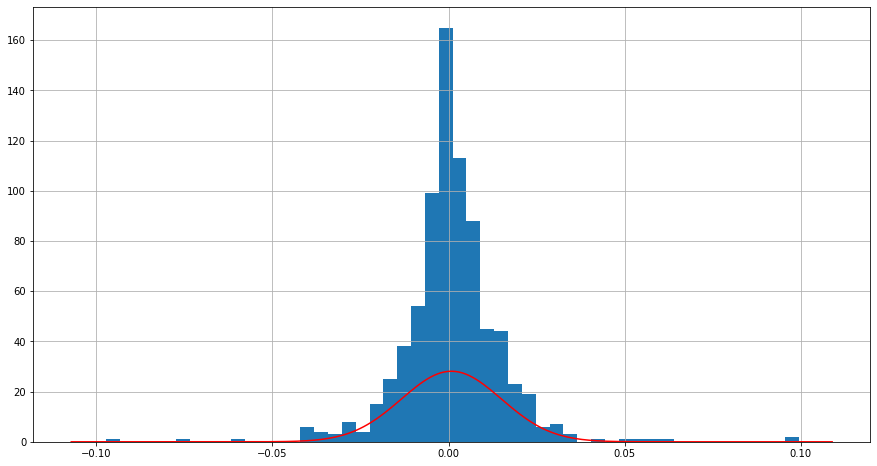

In [13]:
from scipy.stats import norm
mu = ms['LogReturn'].mean()
sigma = ms['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(ms['LogReturn'].min()-0.01, ms['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

ms['LogReturn'].hist(bins=50, figsize=(15, 8))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

## Probablity of drop in stock price of microsoft in a day

In [22]:
# drop of 4% in a day
prob_return1 = norm.cdf(-0.04, mu, sigma)
print('The Probability is ', prob_return1)

#drop of 5% in a day
prob_return1 = norm.cdf(-0.05, mu, sigma)
print('The Probability is ', prob_return1)

# drop of 6% in a day
prob_return1 = norm.cdf(-0.06, mu, sigma)
print('The Probability is ', prob_return1)

The Probability is  0.00201180086384399
The Probability is  0.00017118482608677817
The Probability is  9.113961393980822e-06


## Probablity of drop in stock price of microsoft in an year

In [33]:
# Number of active days in stock market is 220 days in a year
# drop over 40% in a year
mu220 = 220*mu
sigma220 = (220**0.5) * sigma
print('The probability of dropping over 40% in 220 days is ', norm.cdf(-0.4, mu220, sigma220))

# drop over 20% in a year
mu220 = 220*mu
sigma220 = (220**0.5) * sigma
print('The probability of dropping over 20% in 220 days is ', norm.cdf(-0.2, mu220, sigma220))

The probability of dropping over 40% in 220 days is  0.002912363313330548
The probability of dropping over 20% in 220 days is  0.03535237727490905


# Calculating Value at Risk(VaR)


In [34]:
# value at risk is very important for any company as it can predict the amount of loss that the company can face in a certain
# amount of time. This helps in decision making for the future.

In [35]:
VaR = norm.ppf(0.05, mu, sigma)
print('Single day value at risk ', VaR)

Single day value at risk  -0.022523362407065


In [36]:
# Quatile 
# 5% quantile
print('5% quantile ', norm.ppf(0.05, mu, sigma))
# 95% quantile
print('95% quantile ', norm.ppf(0.95, mu, sigma))

5% quantile  -0.022523362407065
95% quantile  0.024163825379311034


In [39]:
# 25% quantile
print('25% quantile ', norm.ppf(0.25, mu, sigma))
# 75% quantile 
print('75% quantile ', norm.ppf(0.75, mu, sigma))

25% quantile  -0.008752057838414963
75% quantile  0.010392520810661006
